In [1]:
from sklearn import datasets

diabetes = datasets.load_diabetes(as_frame=True)
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [18]:
X=diabetes['data']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [19]:
y=diabetes['target']
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [4]:
def evalmetric(y,ypred):
 from scipy.stats import pearsonr
 import numpy as np
 e = y - ypred 
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 crl, _ = pearsonr(y, ypred)
 r2_f = crl*crl
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", round(r2_f, 4))


In [21]:
#Note: You can use ChatGPT or notebooks used in the class to find the answers to the questions
#1.Get the correlation between X variables and y variables.(5 pt)

concat = X
concat['target'] = y 
concat.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [22]:
#2.Split the data into train and test using %25 percent of data(5 pt)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [25]:
#3 Using Decision Tree and Random Forecast, get the evaluation scores on test and training data?
#Pick one of the metric such as MAPE and 
#explain briefly why decision tree perform better in training data although it performs worse on test data (15 pt)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('---Results for Decision Tree---')
print('Train results:')
evalmetric(y_train, y_train_pred)
print('\n\nTest results:')
evalmetric(y_test, y_test_pred)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('\n\n\n---Results for Random Forest---')
print('Train results:')
evalmetric(y_train, y_train_pred)
print('\n\nTest results:')
evalmetric(y_test, y_test_pred)

---Results for Decision Tree---
Train results:
MSE: 0.0
RMSE: 0.0
MAE: 0.0
MAPE: 0.0
R-Squared: 1.0


Test results:
MSE: 8.297297297297296
RMSE: 2.880502959084975
MAE: 1.4504504504504505
MAPE: 1.4478633316518437
R-Squared: 0.9987



---Results for Random Forest---
Train results:
MSE: 0.8237033232628392
RMSE: 0.9075810284833191
MAE: 0.3409667673716019
MAPE: 0.31508304747422694
R-Squared: 0.9999


Test results:
MSE: 7.565578378378383
RMSE: 2.7505596482131383
MAE: 1.1010810810810818
MAPE: 0.7733815407436123
R-Squared: 0.9989


As we see, Decision Tree works good on traaining data, however, it is not good on test data. It is because Decision Tree uses single tree and there is high risk of overfitting to train data. However, Random Forest uses many decision trees; hence, it generalizability performance is better.

In [26]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.6 MB/s eta 0:00:00


In [28]:
#4 Use boosting methods (XGBoost, LightGBM, GradingBoosting Method and CatBoost) to get
# the evaluation scores on test and training data
#Which methods gave  best performance of Boosting technqie on test data based on MAPE metric?
#With this method, Did you get better result from Random Forest on test data based on MAPE metric?(25 pt)
import catboost  as cb
model = cb.CatBoostRegressor(random_state=17)
model.fit(X_train, y_train)
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('\n\n\n---Results for Cat Boost---')
print('Train results:')
evalmetric(y_train, y_train_pred)
print('\n\nTest results:')
evalmetric(y_test, y_test_pred)

from xgboost import XGBRegressor
model = XGBRegressor(random_state=17)
model.fit(X_train, y_train)
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('\n\n\n---Results for XGBoost---')
print('Train results:')
evalmetric(y_train, y_train_pred)
print('\n\nTest results:')
evalmetric(y_test, y_test_pred)

import lightgbm as lgb
model = lgb.LGBMRegressor(random_state=17)
model.fit(X_train, y_train)
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('\n\n\n---Results for LGBM---')
print('Train results:')
evalmetric(y_train, y_train_pred)
print('\n\nTest results:')
evalmetric(y_test, y_test_pred)

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=17)
model.fit(X_train, y_train)
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('\n\n\n---Results for Gradient Boost---')
print('Train results:')
evalmetric(y_train, y_train_pred)
print('\n\nTest results:')
evalmetric(y_test, y_test_pred)

Learning rate set to 0.034381
0:	learn: 74.6806976	total: 2.04ms	remaining: 2.04s
1:	learn: 72.9064470	total: 3.63ms	remaining: 1.81s
2:	learn: 71.2754413	total: 5.25ms	remaining: 1.74s
3:	learn: 69.3512129	total: 6.74ms	remaining: 1.68s
4:	learn: 67.7724058	total: 8.21ms	remaining: 1.63s
5:	learn: 66.0718367	total: 9.84ms	remaining: 1.63s
6:	learn: 64.6057023	total: 11.3ms	remaining: 1.6s
7:	learn: 63.1395403	total: 12.7ms	remaining: 1.58s
8:	learn: 61.3461758	total: 14.2ms	remaining: 1.56s
9:	learn: 59.7511440	total: 15.6ms	remaining: 1.55s
10:	learn: 58.0732490	total: 17.1ms	remaining: 1.54s
11:	learn: 56.8536872	total: 18.5ms	remaining: 1.53s
12:	learn: 55.4111462	total: 20ms	remaining: 1.52s
13:	learn: 53.8652412	total: 21.4ms	remaining: 1.51s
14:	learn: 52.5692363	total: 22.9ms	remaining: 1.5s
15:	learn: 51.2500510	total: 24.3ms	remaining: 1.49s
16:	learn: 49.9381871	total: 25.7ms	remaining: 1.49s
17:	learn: 48.8562494	total: 26.7ms	remaining: 1.46s
18:	learn: 47.6209177	total: 2

As we see, we get better performance in Gradient Boost according to MAPE metric. And if we compare, we can see that Gradient Boost showed better performance than Random Forest according to MAPE metric. This is because boosting techniques more focus on more error points, so it gives more weight to the points that had more error in previous iterations. So, sequentially, it decreases error more.

In [29]:
#for the other question use following data. Data description is provided below
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

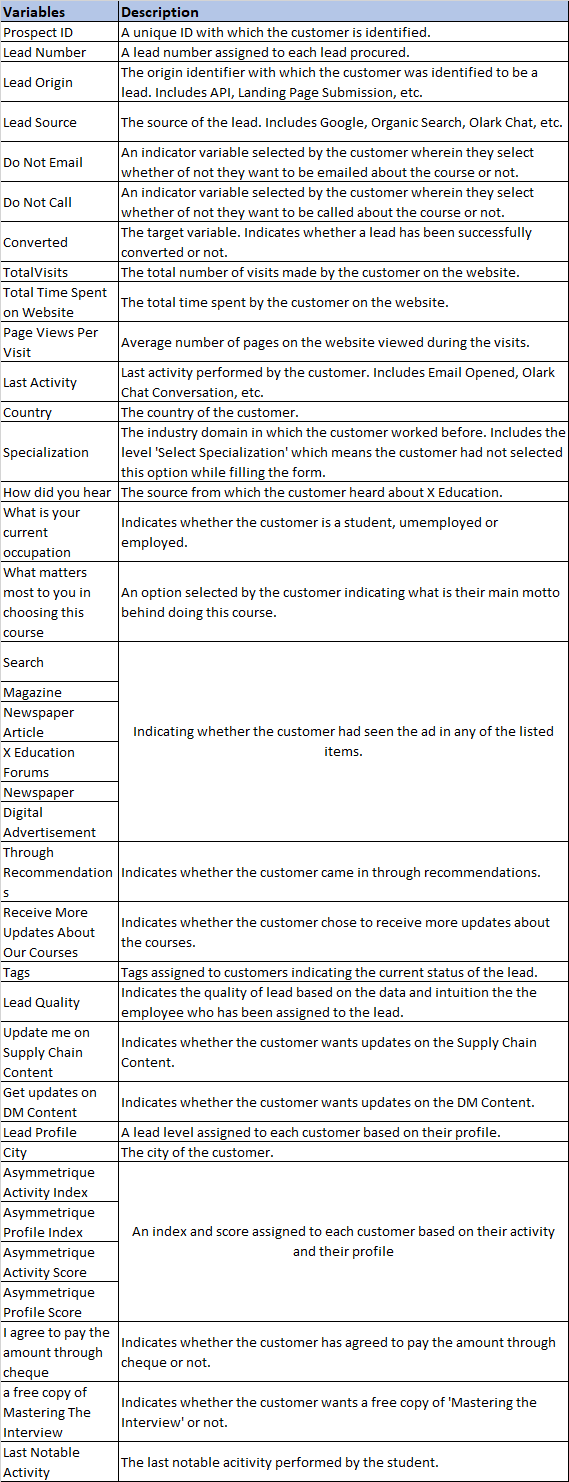

In [30]:
#Q5 (10 pt) There are missing values in the Lead data .
# Replace missing variables with the mean  if variable is numeric or mode if variable is categorical.

df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [31]:
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

df.isna().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [39]:
#Q6-(10 pt)Convert categorical variables to numerical with label encoder method .
#Drop Prospect ID	Lead Number from the variables and use converted as target variables.
#Split data into train and test using 30% of the data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df = df.drop(columns=['Prospect ID'])
y = df['Converted']
X = df.drop(columns=['Converted'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [43]:
#Q7(30 pt)Use decison tree, random forest andboosting methods (XGBoost, LightGBM, GradingBoosting Method) to get
# the accuracy scores on test  data
#Which methods gave  best performance on test data based on accuracy metric?

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('---Results for Decision Tree---')
print('Train results:', accuracy_score(y_train, y_train_pred))
print('Test results:', accuracy_score(y_test, y_test_pred))

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('\n\n---Results for Random Forest---')
print('Train results:', accuracy_score(y_train, y_train_pred))
print('Test results:', accuracy_score(y_test, y_test_pred))

---Results for Decision Tree---
Train results: 1.0
Test results: 0.8982683982683982


---Results for Random Forest---
Train results: 1.0
Test results: 0.9231601731601732


In [44]:
import catboost  as cb
model = cb.CatBoostClassifier(random_state=17)
model.fit(X_train, y_train)
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('\n---Results for Cat Boost---')
print('Train results:', accuracy_score(y_train, y_train_pred))
print('Test results:', accuracy_score(y_test, y_test_pred))

from xgboost import XGBClassifier
model = XGBClassifier(random_state=17)
model.fit(X_train, y_train)
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('\n---Results for XGBoost---')
print('Train results:', accuracy_score(y_train, y_train_pred))
print('Test results:', accuracy_score(y_test, y_test_pred))

import lightgbm as lgb
model = lgb.LGBMClassifier(random_state=17)
model.fit(X_train, y_train)
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('\n--Results for LGBM---')
print('Train results:', accuracy_score(y_train, y_train_pred))
print('Test results:', accuracy_score(y_test, y_test_pred))

from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=17)
model.fit(X_train, y_train)
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('\n---Results for Gradient Boost---')
print('Train results:', accuracy_score(y_train, y_train_pred))
print('Test results:', accuracy_score(y_test, y_test_pred))

Learning rate set to 0.022863
0:	learn: 0.6718423	total: 3.62ms	remaining: 3.62s
1:	learn: 0.6517061	total: 6.93ms	remaining: 3.46s
2:	learn: 0.6314042	total: 10.2ms	remaining: 3.4s
3:	learn: 0.6128585	total: 13.5ms	remaining: 3.37s
4:	learn: 0.5972020	total: 16.7ms	remaining: 3.32s
5:	learn: 0.5816026	total: 20ms	remaining: 3.31s
6:	learn: 0.5679357	total: 23.3ms	remaining: 3.31s
7:	learn: 0.5550342	total: 26.8ms	remaining: 3.32s
8:	learn: 0.5416944	total: 30.1ms	remaining: 3.32s
9:	learn: 0.5298939	total: 33.5ms	remaining: 3.32s
10:	learn: 0.5193062	total: 36.8ms	remaining: 3.31s
11:	learn: 0.5085381	total: 40.1ms	remaining: 3.3s
12:	learn: 0.4977902	total: 43.5ms	remaining: 3.3s
13:	learn: 0.4881472	total: 46.8ms	remaining: 3.3s
14:	learn: 0.4806683	total: 50.1ms	remaining: 3.29s
15:	learn: 0.4736872	total: 53.4ms	remaining: 3.28s
16:	learn: 0.4657145	total: 56.8ms	remaining: 3.28s
17:	learn: 0.4592477	total: 60ms	remaining: 3.27s
18:	learn: 0.4520722	total: 63.3ms	remaining: 3.27s


As we see, Light GBM gives the best result on test data according to accuracy score. Also, XGBoost and CatBoost showed good performance. In general, again boosting methods showed better performance on test data rather than Random Forest and Decision Tree. It is because Boosting methods give more weight to misclassified data points trying to classify them correctly in next iteration.